In [5]:
 # Importing needed libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import random

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New Section

In [7]:
# Importing the training dataset
dataset_training = pd.read_csv('/content/drive/MyDrive/Deep Learning with AI/Time series RNN LSTM/AMZN_train.csv')
# Displaying the first 5 records 
dataset_training.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,398.799988,399.359985,394.019989,397.970001,397.970001,2137800
1,2014-01-03,398.290009,402.709991,396.220001,396.440002,396.440002,2210200
2,2014-01-06,395.850006,397.000000,388.420013,393.630005,393.630005,3170600
3,2014-01-07,395.040009,398.470001,394.290009,398.029999,398.029999,1916000
4,2014-01-08,398.470001,403.000000,396.040009,401.920013,401.920013,2316500


In [8]:
# Assigning the predictor column
training_data = dataset_training[['Open']].values
# Displaying the first 5 records 
training_data

array([[ 398.799988],
       [ 398.290009],
       [ 395.850006],
       ...,
       [1454.199951],
       [1473.349976],
       [1510.800049]])

In [9]:
# Importing Scaling libraries
from sklearn.preprocessing import MinMaxScaler
# Defining MinMax standard scaling
sc = MinMaxScaler(feature_range = (0, 1))
# Scaling the training data 
training_data_scaled = sc.fit_transform(training_data)
# Displaying the scaled training data
training_data_scaled 

array([[0.06523313],
       [0.06494233],
       [0.06355099],
       ...,
       [0.66704299],
       [0.67796271],
       [0.69931748]])

In [10]:
# Creating place holders to store X and y training data
X_train = []
y_train = []
# Creating training datasets using window sliding architecture setting window size as 60
for i in range(60, 1258):
    X_train.append(training_data_scaled[i-60:i, 0])
    y_train.append(training_data_scaled[i, 0])
# Converting dataframes to arrays
X_train, y_train = np.array(X_train), np.array(y_train)
# Displaying the train data
X_train

array([[0.06523313, 0.06494233, 0.06355099, ..., 0.04147209, 0.03350041,
        0.03173272],
       [0.06494233, 0.06355099, 0.06308912, ..., 0.03350041, 0.03173272,
        0.03307274],
       [0.06355099, 0.06308912, 0.06504497, ..., 0.03173272, 0.03307274,
        0.0306151 ],
       ...,
       [0.99080806, 0.97826323, 0.96783389, ..., 0.67319568, 0.60534525,
        0.61839758],
       [0.97826323, 0.96783389, 0.94918773, ..., 0.60534525, 0.61839758,
        0.66704299],
       [0.96783389, 0.94918773, 0.93150521, ..., 0.61839758, 0.66704299,
        0.67796271]])

In [11]:
# Reshaping the train data from array to 1 dimensional vector to feed to Neural Network
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
# Displaying the reshaped vector data
X_train

array([[[0.06523313],
        [0.06494233],
        [0.06355099],
        ...,
        [0.04147209],
        [0.03350041],
        [0.03173272]],

       [[0.06494233],
        [0.06355099],
        [0.06308912],
        ...,
        [0.03350041],
        [0.03173272],
        [0.03307274]],

       [[0.06355099],
        [0.06308912],
        [0.06504497],
        ...,
        [0.03173272],
        [0.03307274],
        [0.0306151 ]],

       ...,

       [[0.99080806],
        [0.97826323],
        [0.96783389],
        ...,
        [0.67319568],
        [0.60534525],
        [0.61839758]],

       [[0.97826323],
        [0.96783389],
        [0.94918773],
        ...,
        [0.60534525],
        [0.61839758],
        [0.66704299]],

       [[0.96783389],
        [0.94918773],
        [0.93150521],
        ...,
        [0.61839758],
        [0.66704299],
        [0.67796271]]])

In [12]:
# Importing the RNN and LSTM related Neural Network packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [13]:
# Building the RNN Architecure with LSTM
model = Sequential()

# Adding the input LSTM layer and setting to return full sequence to next layer
model.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))

# Adding a second LSTM layer and and setting to return full sequence to next layer
model.add(LSTM(units = 100, return_sequences = True))

# Adding a third LSTM layer and and setting to return full sequence to next layer
model.add(LSTM(units = 100, return_sequences = True))

# Adding a fourth LSTM layer
model.add(LSTM(units = 100))

# Adding the output layer
model.add(Dense(units = 1))

In [14]:
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 13s 187ms/step - loss: 0.0382
Epoch 2/100
38/38 [==============================] - 7s 187ms/step - loss: 0.0013
Epoch 3/100
38/38 [==============================] - 7s 186ms/step - loss: 0.0011
Epoch 4/100
38/38 [==============================] - 7s 187ms/step - loss: 8.6933e-04
Epoch 5/100
38/38 [==============================] - 7s 188ms/step - loss: 0.0011
Epoch 6/100
38/38 [==============================] - 7s 187ms/step - loss: 9.7488e-04
Epoch 7/100
38/38 [==============================] - 7s 187ms/step - loss: 0.0011
Epoch 8/100
38/38 [==============================] - 7s 188ms/step - loss: 0.0010
Epoch 9/100
38/38 [==============================] - 7s 186ms/step - loss: 6.6007e-04
Epoch 10/100
38/38 [==============================] - 7s 187ms/step - loss: 8.6299e-04
Epoch 11/100
38/38 [==============================] - 7s 191ms/step - loss: 7.5965e-04
Epoch 12/100
38/38 [==============================] - 7s 186ms/step - loss:

In [16]:
# Loading the test data set
dataset_testing = pd.read_csv('/content/drive/MyDrive/Deep Learning with AI/Time series RNN LSTM/AMZN_test.csv')
# Assigning the actual values to a variable
actual_stock_price = dataset_testing[['Open']].values
# Displaying the actual values captured
actual_stock_price

array([[1465.199951],
       [1520.01001 ],
       [1530.      ],
       [1602.310059],
       [1664.689941],
       [1652.97998 ],
       [1641.01001 ],
       [1640.550049],
       [1615.      ],
       [1632.      ],
       [1684.219971],
       [1680.      ],
       [1712.      ],
       [1681.      ],
       [1656.      ],
       [1641.069946],
       [1670.5     ],
       [1643.589966],
       [1631.27002 ],
       [1623.      ],
       [1692.849976]])

In [17]:
# Combining the label values (Open Price) from training and test data sets to get complete list of predictions 
total_data = pd.concat((dataset_training['Open'], dataset_testing['Open']), axis = 0)
# Creating output dataset taking first 60 entries as features
inputs = total_data[len(total_data) - len(dataset_testing) - 60:].values
# Reshaping the train data from array to 1 dimensional vector to feed to Neural Network
inputs = inputs.reshape(-1,1)
# Scaling the input data
inputs = sc.transform(inputs)
inputs

array([[0.94918773],
       [0.93150521],
       [0.90642125],
       [0.89843247],
       [0.89723502],
       [0.8208883 ],
       [0.86878675],
       [0.8613739 ],
       [0.85481637],
       [0.88862472],
       [0.87647901],
       [0.85576295],
       [0.85510148],
       [0.8312891 ],
       [0.84922819],
       [0.80910754],
       [0.77845823],
       [0.78439423],
       [0.68526726],
       [0.73306875],
       [0.76359834],
       [0.7949946 ],
       [0.78300857],
       [0.76064457],
       [0.79180709],
       [0.83856511],
       [0.82573516],
       [0.80619943],
       [0.7782872 ],
       [0.7822958 ],
       [0.73935259],
       [0.74305331],
       [0.73707171],
       [0.65752035],
       [0.71767282],
       [0.70285282],
       [0.71539765],
       [0.73649007],
       [0.75811854],
       [0.79294182],
       [0.79551352],
       [0.84681046],
       [0.83913533],
       [0.75866022],
       [0.81009401],
       [0.76377507],
       [0.79465819],
       [0.789

In [18]:
# Creating a place holder to store test values
X_test = []

# Creating data rows with first 60 as features for each of the rows in the test data
for i in range(60, 81):
    X_test.append(inputs[i-60:i, 0])

#Displaying the dataset contents
X_test

[array([0.94918773, 0.93150521, 0.90642125, 0.89843247, 0.89723502,
        0.8208883 , 0.86878675, 0.8613739 , 0.85481637, 0.88862472,
        0.87647901, 0.85576295, 0.85510148, 0.8312891 , 0.84922819,
        0.80910754, 0.77845823, 0.78439423, 0.68526726, 0.73306875,
        0.76359834, 0.7949946 , 0.78300857, 0.76064457, 0.79180709,
        0.83856511, 0.82573516, 0.80619943, 0.7782872 , 0.7822958 ,
        0.73935259, 0.74305331, 0.73707171, 0.65752035, 0.71767282,
        0.70285282, 0.71539765, 0.73649007, 0.75811854, 0.79294182,
        0.79551352, 0.84681046, 0.83913533, 0.75866022, 0.81009401,
        0.76377507, 0.79465819, 0.78952621, 0.79579863, 0.7718494 ,
        0.73079358, 0.71596787, 0.71770707, 0.68403557, 0.67319568,
        0.60534525, 0.61839758, 0.66704299, 0.67796271, 0.69931748]),
 array([0.93150521, 0.90642125, 0.89843247, 0.89723502, 0.8208883 ,
        0.86878675, 0.8613739 , 0.85481637, 0.88862472, 0.87647901,
        0.85576295, 0.85510148, 0.8312891 , 0.

In [19]:
# Converting dataframes to arrays
X_test = np.array(X_test)

# Displaying the array contents
X_test

array([[0.94918773, 0.93150521, 0.90642125, ..., 0.66704299, 0.67796271,
        0.69931748],
       [0.93150521, 0.90642125, 0.89843247, ..., 0.67796271, 0.69931748,
        0.67331541],
       [0.90642125, 0.89843247, 0.89723502, ..., 0.69931748, 0.67331541,
        0.70456918],
       ...,
       [0.68526726, 0.73306875, 0.76359834, ..., 0.77359994, 0.79038154,
        0.77503691],
       [0.73306875, 0.76359834, 0.7949946 , ..., 0.79038154, 0.77503691,
        0.76801183],
       [0.76359834, 0.7949946 , 0.78300857, ..., 0.77503691, 0.76801183,
        0.76329611]])

In [20]:
# Reshaping the train data from array to 1 dimensional vector to feed to Neural Network
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Displaying the vector contents
X_test

array([[[0.94918773],
        [0.93150521],
        [0.90642125],
        ...,
        [0.66704299],
        [0.67796271],
        [0.69931748]],

       [[0.93150521],
        [0.90642125],
        [0.89843247],
        ...,
        [0.67796271],
        [0.69931748],
        [0.67331541]],

       [[0.90642125],
        [0.89843247],
        [0.89723502],
        ...,
        [0.69931748],
        [0.67331541],
        [0.70456918]],

       ...,

       [[0.68526726],
        [0.73306875],
        [0.76359834],
        ...,
        [0.77359994],
        [0.79038154],
        [0.77503691]],

       [[0.73306875],
        [0.76359834],
        [0.7949946 ],
        ...,
        [0.79038154],
        [0.77503691],
        [0.76801183]],

       [[0.76359834],
        [0.7949946 ],
        [0.78300857],
        ...,
        [0.77503691],
        [0.76801183],
        [0.76329611]]])

In [21]:
# Using the built RNN LSTM model to predict the values
predicted_stock_price = model.predict(X_test)

# Using inverse transform to get absolute values 
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

Visualize the Results

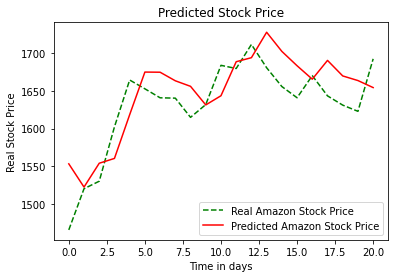

In [22]:
# Visualising the results comparing actual values and predicted values
plt.plot(actual_stock_price, color = 'green', label = 'Real Amazon Stock Price',ls='--')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Amazon Stock Price',ls='-')
plt.title('Predicted Stock Price')
plt.xlabel('Time in days')
plt.ylabel('Real Stock Price')
plt.legend()
plt.show()